# Assignment 3: Numerical Solution of an Ordinary Differential Equation

This notebook explores numerical solutions to the ordinary differential equation:

$
f(x, t) = \frac{dx}{dt} = (1 + t)x + 1 - 3t + t^2
$

### Objectives:
1. **Direction Field**: Visualize the direction field for $ t \in [0, 5] $ and $ x \in [-3, 3] $.
2. **Numerical Methods**: Solve the ODE using:
   - Euler Method
   - Improved Euler Method
   - Runge-Kutta Method
3. **Comparison**: Analyze the behavior of the solutions with different step sizes ($ h = 0.04 $ and $ h = 0.02 $).
4. **Critical Value**: Identify the starting value $ x(t=0) $ such that $ x(t=5) \in [-2.0, -1.9] $.

### Deliverables:
- Direction field visualization.
- Numerical solutions plotted for all methods.
- Observations on the accuracy and benefits of different integration schemes.
- Python code for solving the ODE and generating the results.

### Task 1:
1. **Direction Field**: Visualize the direction field for $ t \in [0, 5] $ and $ x \in [-3, 3] $. With,

            
$f(x, t) = \frac{dx}{dt} = (1 + t)x + 1 - 3t + t^2$
            

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Define the ODE function
def f(x, t):
    return (1 + t) * x + 1 - 3 * t + t**2

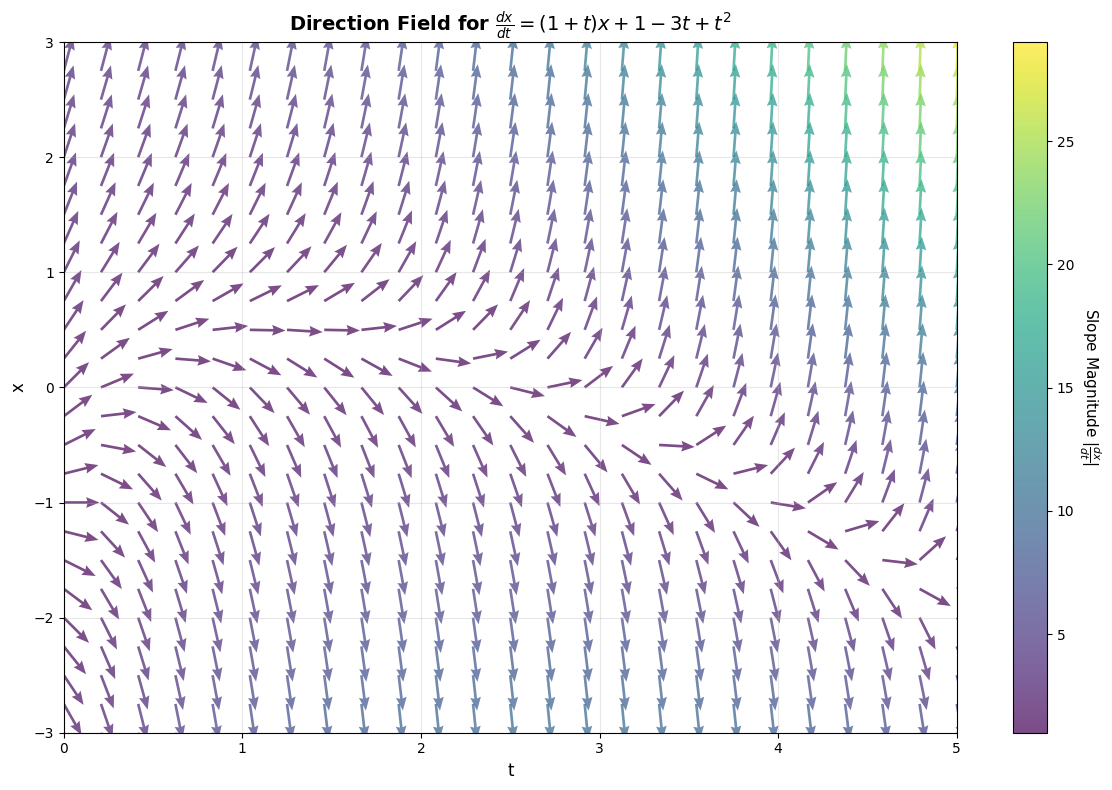

In [22]:
def direction_field():
    # Create grid
    t_values = np.linspace(0, 5, 25)
    x_values = np.linspace(-3, 3, 25)

    # Create meshgrid
    T, X = np.meshgrid(t_values, x_values)

    # Calculate slopes (dx/dt) at each grid point
    dT = np.ones_like(T)  # dt = 1 (unit step in t direction)
    dX = f(X, T)           # dx/dt from our ODE

    # Normalize arrows for better visualization
    # This makes all arrows the same length, only showing direction
    magnitude = np.sqrt(dT**2 + dX**2)
    dT_norm = dT / magnitude
    dX_norm = dX / magnitude

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot direction field using quiver
    Q = ax.quiver(T, X, dT_norm, dX_norm, 
                    magnitude, 
                    cmap='viridis',
                    alpha=0.7,
                    scale=25,
                    width=0.003,
                    headwidth=4,
                    headlength=5)

    # Add colorbar to show magnitude
    cbar = plt.colorbar(Q, ax=ax)
    cbar.set_label(r'Slope Magnitude $|\frac{dx}{dt}|$', rotation=270, labelpad=20, fontsize=11)

    # Labels and formatting
    ax.set_xlabel('t', fontsize=12)
    ax.set_ylabel('x', fontsize=12)
    ax.set_title(r'Direction Field for $\frac{dx}{dt} = (1+t)x + 1 - 3t + t^2$', 
                    fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 5)
    ax.set_ylim(-3, 3)


    plt.tight_layout()
    plt.savefig('direction_field.png', dpi=300, bbox_inches='tight')

direction_field()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-1/Assignments/Comp_Sim_Assignment_3/plots/direction_field.pdf')
plt.show()


### Task 2:
2. **Numerical Methods**: Solve the ODE using:
   - Simple Euler Method


In [23]:
# define simple euler update - From Blackboard scripts
def seuler(t, x, step):
    """Simple Euler method: x_new = x + h * f(x, t)"""
    x_new = x + step * f(x, t)
    return x_new

In [24]:


def ieuler(x, y, step):
    """
    Improved Euler where:
    x = time (t)
    y = position (x in assignment)
    """
    y_new = y + 0.5*step*( f(y, x) + f(y + step*f(y, x), x + step) )
    return y_new

In [25]:
def rk(x, y, step):
    """
    RK4 method where:
    x = time (t)
    y = position (x in assignment notation)
    """
    k1 = f(y, x)
    k2 = f(y + 0.5*step*k1, x + 0.5*step)
    k3 = f(y + 0.5*step*k2, x + 0.5*step)
    k4 = f(y + step*k3, x + step)
    y_new = y + step/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return y_new

In [26]:
# Initialize
t = 0.0
x = 0.0655
h = 0.04
t_end = 5.0
# Set a threshold for "infinity" (optional, for catching overflow before it happens)
x_threshold = 1e10  # Consider values above this as "infinity"


t_values_seular = [t]
x_values_seular = [x]

t_values_ieuler = [t]
x_values_ieuler = [x]

t_values_rk = [t]
x_values_rk = [x]


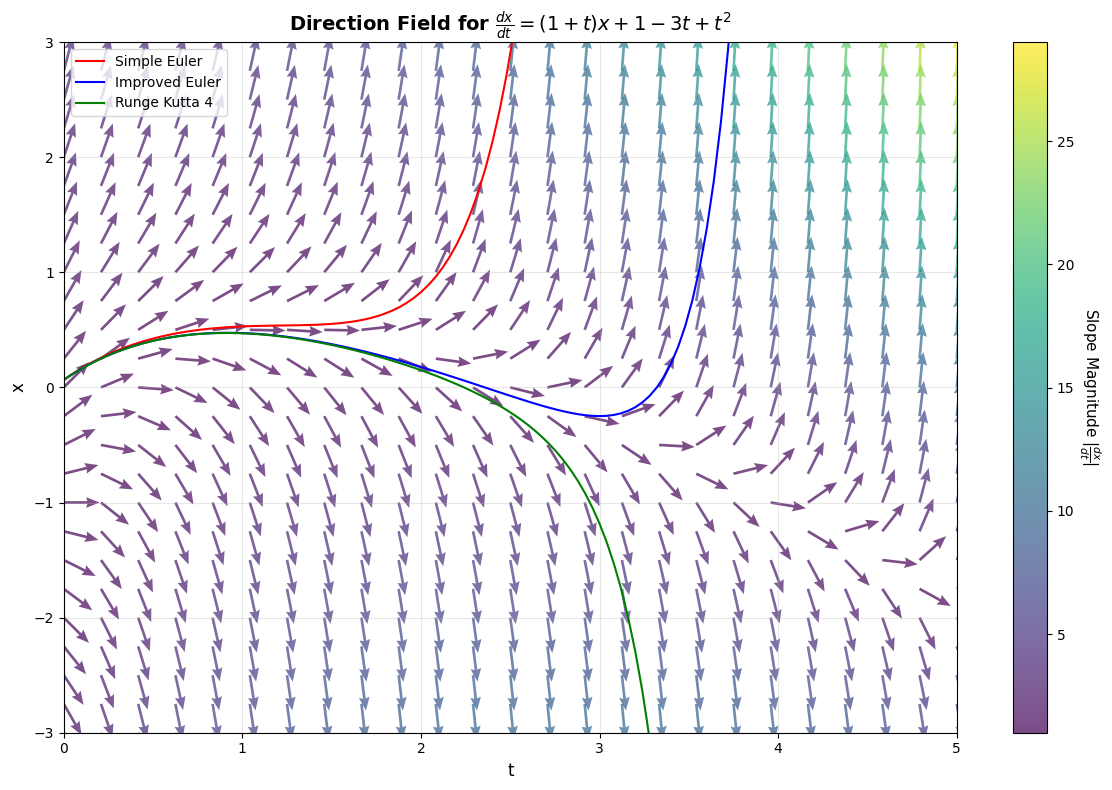

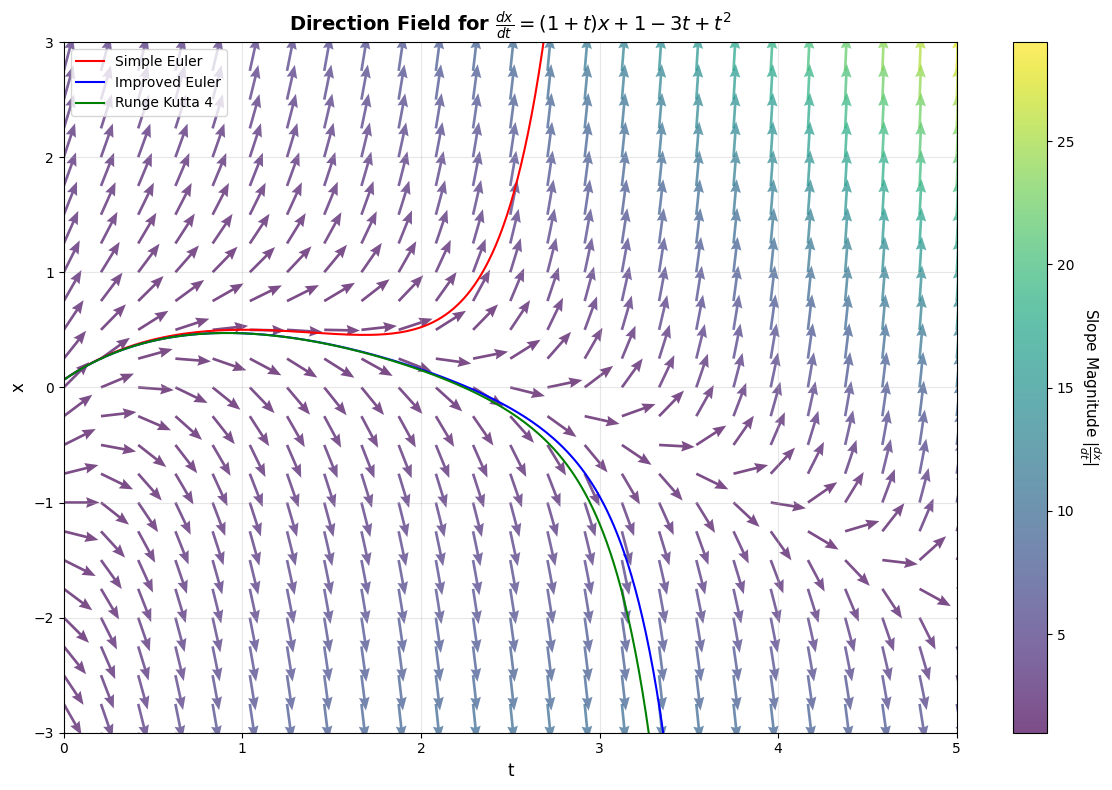

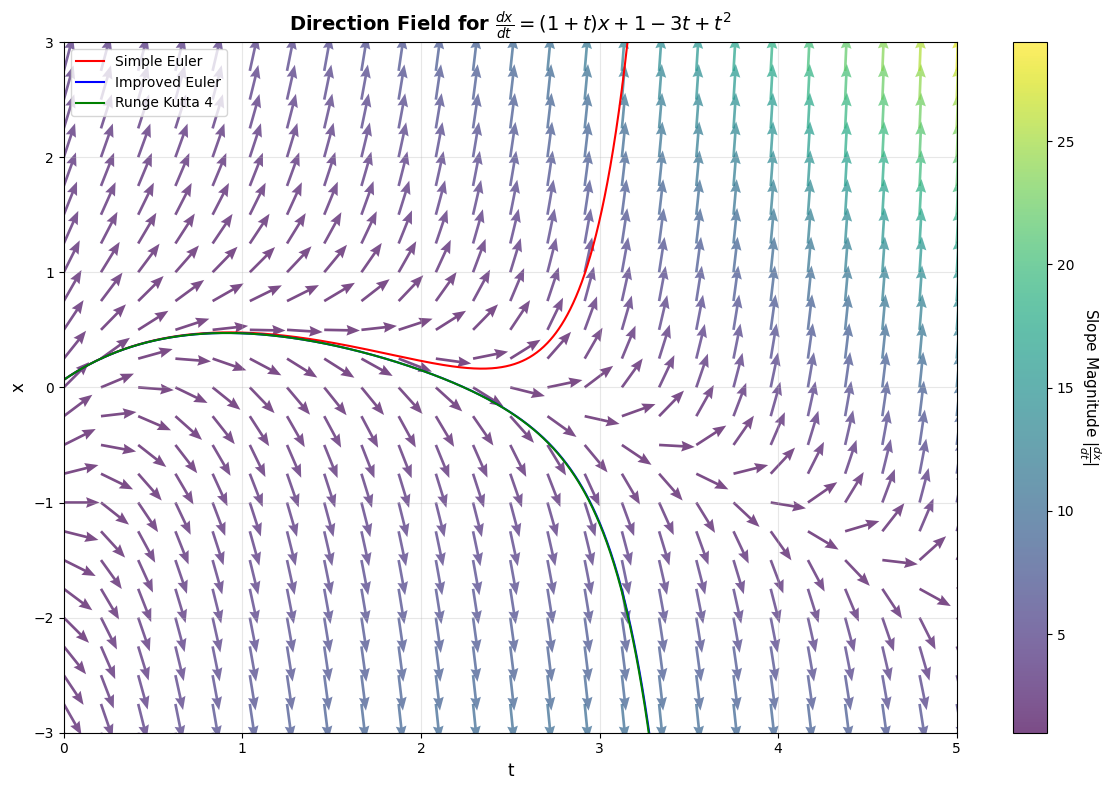

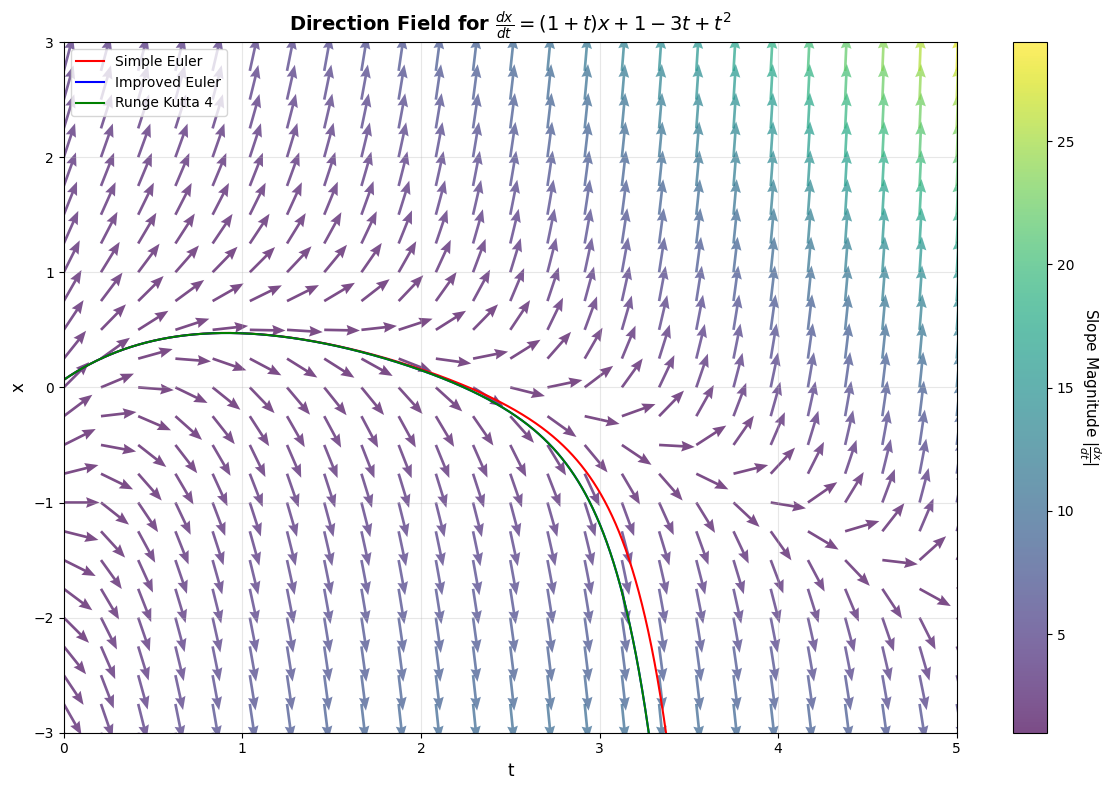

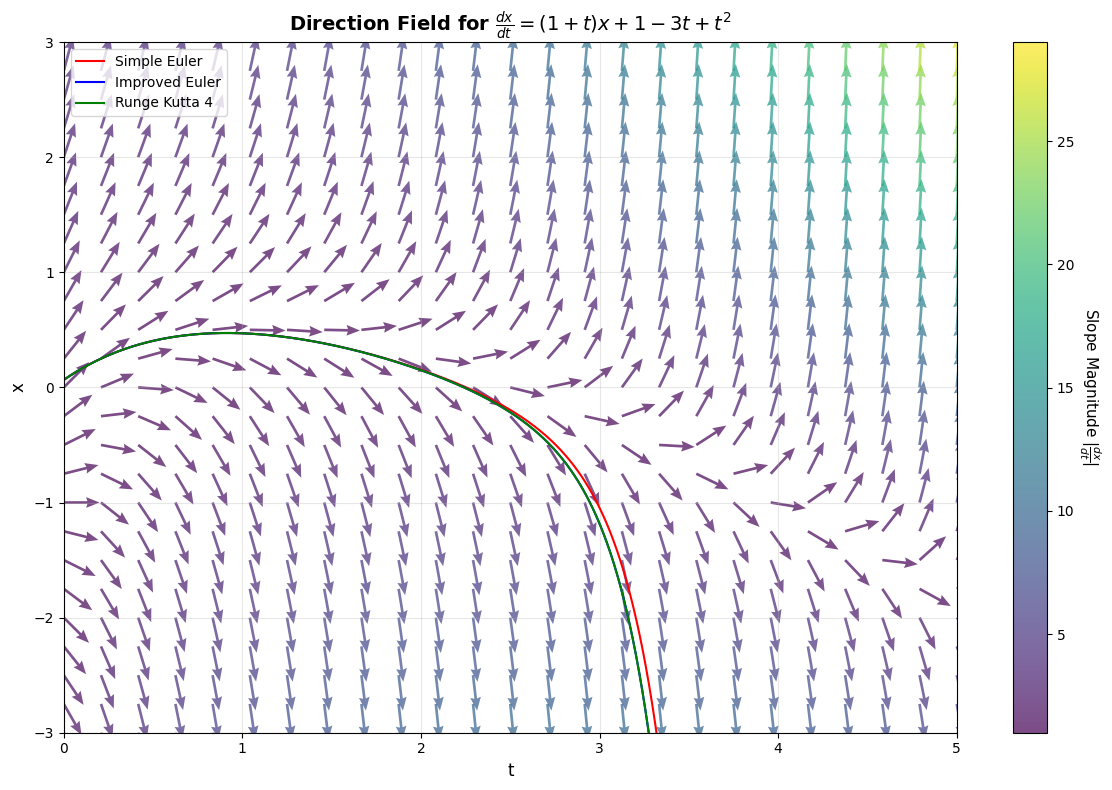

In [31]:
def integrate(h):
        # Initialize
    t = 0.0
    x = 0.0655
    t_end = 5.0
    # Set a threshold for "infinity" (optional, for catching overflow before it happens)
    x_threshold = 1e10  # Consider values above this as "infinity"


    t_values_seular = [t]
    x_values_seular = [x]

    t_values_ieuler = [t]
    x_values_ieuler = [x]

    t_values_rk = [t]
    x_values_rk = [x]

    # Iterate
    while t < t_end:
        # Check for infinity or NaN
        if np.isinf(x) or np.isnan(x) or abs(x) > x_threshold:
            print(f"Solution with simple eular method diverged at t = {t:.4f}, x = {x}")
            print("Terminating integration early.")
            break
        x = seuler(t, x, h)  # Update x
        t = t + h             # Update t
        t_values_seular.append(t)
        x_values_seular.append(x)

    t=0
    x = 0.0655 #Reset x value

    # Iterate
    while t < t_end:
        # Check for infinity or NaN
        if np.isinf(x) or np.isnan(x) or abs(x) > x_threshold:
            print(f"Solution with improved eular method diverged at t = {t:.4f}, x = {x}")
            print("Terminating integration early.")
            break

        x = ieuler(t, x, h)  # Update x
        t = t + h             # Update t


        t_values_ieuler.append(t)
        x_values_ieuler.append(x)

    t=0
    x = 0.0655 #Reset x value

    # Iterate
    while t < t_end:
        # Check for infinity or NaN
        if np.isinf(x) or np.isnan(x) or abs(x) > x_threshold:
            print(f"Solution with Runge Kutte diverged at t = {t:.4f}, x = {x}")
            print("Terminating integration early.")
            break
        x = rk(t, x, h)  # Update x
        t = t + h             # Update t

        
        t_values_rk.append(t)
        x_values_rk.append(x)
    return t_values_seular, x_values_seular, t_values_ieuler, x_values_ieuler, t_values_rk, x_values_rk


for step_size in [0.04, 0.02, 0.004, 0.0004, 0.0002]: 
    t_values_seular, x_values_seular, t_values_ieuler, x_values_ieuler, t_values_rk, x_values_rk = integrate(step_size)
    direction_field()


    plt.plot(t_values_seular, x_values_seular, label='Simple Euler', color='red')
    plt.plot(t_values_ieuler, x_values_ieuler, label='Improved Euler', color='blue')
    plt.plot(t_values_rk, x_values_rk, label='Runge Kutta 4', color='green')
    plt.legend(loc='upper left')
    plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-1/Assignments/Comp_Sim_Assignment_3/plots/direction_field_solution.pdf')
    plt.show()